# Imports

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

In [ ]:
df = pd.read_csv("ACXSPublic2022.csv", header=0, encoding='ISO-8859-1', escapechar='\\') # legacy encoding for latin alphabet
df.head(2)

In [ ]:
# desired column names of the dataset
income = 'Income'
mood = 'Mood Scale'

# Pre-processing

In [ ]:
# remove any symbols and whitespaces
df[income] = df[income].str.replace('>', '').str.strip()

In [ ]:
# check data type
df[income]

0       135000
1       150000
2       136000
3          NaN
4          NaN
         ...  
6924       NaN
6925       NaN
6926    120000
6927     60000
6928       NaN
Name: Income, Length: 6929, dtype: object

In [ ]:
# check data type
df[mood]

0       10.0
1        5.0
2        6.0
3        8.0
4        7.0
        ... 
6924     8.0
6925     6.0
6926     9.0
6927     8.0
6928     5.0
Name: Mood Scale, Length: 6929, dtype: float64

In [ ]:
# convert from object type to numeric. If any error occurs while reading the values they are converted to NaNs
df.loc[:, income] = pd.to_numeric(df[income], errors="coerce")

<ipython-input-10-c76183300b17>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, income] = pd.to_numeric(df[income], errors="coerce")


In [ ]:
# # check data type again
df[income]

0       135000.0
1       150000.0
2       136000.0
3            NaN
4            NaN
          ...   
6924         NaN
6925         NaN
6926    120000.0
6927     60000.0
6928         NaN
Name: Income, Length: 6929, dtype: float64

In [ ]:
# check number of NaNs
df[income].isna().sum()

1482

In [ ]:
# only want rows which are filled for both columns
# create a new df called filtered_df with these rows
filtered_df = df[df[income].notna() & df[mood].notna()]

In [ ]:
# check data type
filtered_df[income]

0       135000.0
1       150000.0
2       136000.0
6        24000.0
7         3000.0
          ...   
6921    100000.0
6922     60000.0
6923    100000.0
6926    120000.0
6927     60000.0
Name: Income, Length: 5437, dtype: float64

In [ ]:
# check data type
filtered_df[mood]

0       10.0
1        5.0
2        6.0
6        5.0
7        6.0
        ... 
6921     5.0
6922     6.0
6923     8.0
6926     9.0
6927     8.0
Name: Mood Scale, Length: 5437, dtype: float64

In [ ]:
# check number of NaNs. should be 0
filtered_df[income].isna().sum()

0

In [ ]:
# check number of NaNs. should be 0
filtered_df[mood].isna().sum()

0

# Visualizations

<Axes: xlabel='Income', ylabel='Count'>

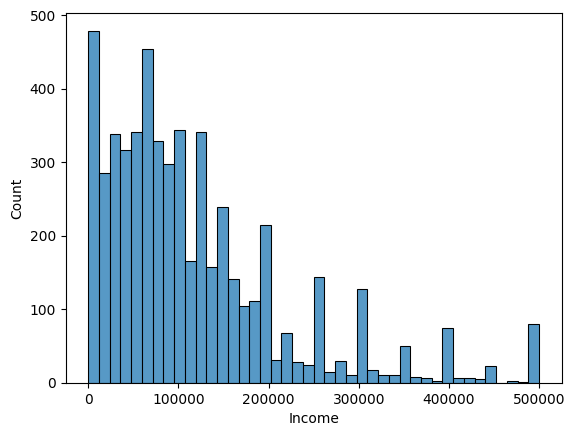

In [ ]:
# 1d data visualization. histogram for income
sns.histplot(data=filtered_df, x=income)

<Axes: xlabel='Mood Scale', ylabel='Count'>

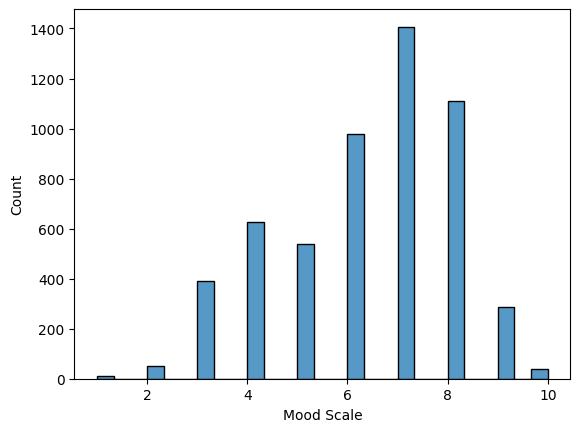

In [ ]:
# 1d data visualization. histogram for mood
sns.histplot(data=filtered_df, x=mood)

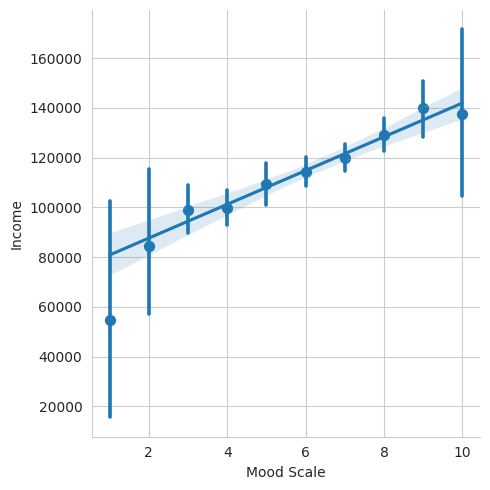

In [ ]:
# scatterplot with x estimator
sns.set_style('whitegrid')
sns.lmplot(x=mood, y=income, data=filtered_df, x_estimator=np.mean)
 #hue=mood, palette='plasma')

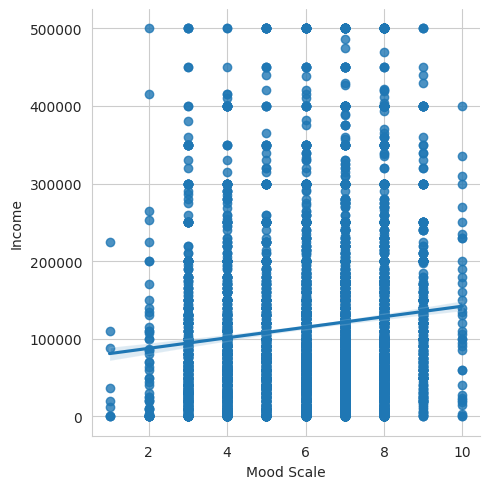

In [ ]:
# scatterplot
sns.set_style('whitegrid')
sns.lmplot(x=mood, y=income, data=filtered_df)
#hue=mood, palette='plasma')

In [ ]:
# check linear regression coefficients
stats.linregress(x=filtered_df[mood], y=filtered_df[income], alternative='two-sided')

LinregressResult(slope=6789.466162590155, intercept=74062.93477860824, rvalue=0.1140702318289082, pvalue=3.26421862033835e-17, stderr=802.0832779497322, intercept_stderr=5210.791544667102)

In [ ]:
stats.pearsonr(filtered_df[income], filtered_df[mood])

PearsonRResult(statistic=0.11461989242600101, pvalue=4.0631073265956444e-17)

In [ ]:
# another method of checking linear regression coefficients and robustness measures using statsmodel.api
X = filtered_df[mood]
y = filtered_df[income]

In [ ]:
X = sm.add_constant(X) # adds a constant term for intercept rather than line passing through origin
reg = sm.OLS(y, X).fit() # ordinary least squares, fit the regression model

In [ ]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     71.65
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           3.26e-17
Time:                        06:36:46   Log-Likelihood:                -70433.
No. Observations:                5437   AIC:                         1.409e+05
Df Residuals:                    5435   BIC:                         1.409e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.406e+04   5210.792     14.213      0.000    6.38e+04    8.43e+04
Mood Scale  6789.4662    802.083      8.465      0.000    5217.062    8361.871
==============================================================================
Omnibus:                     1528.093   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3733.717
Skew:                           1.556   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# print residuals
reg.resid

0        -6957.596405
1        41989.734408
2        21200.268246
6       -84010.265592
7      -111799.731754
            ...      
6921     -8010.265592
6922    -54799.731754
6923    -28378.664079
6926    -15168.130242
6927    -68378.664079
Length: 5437, dtype: float64

In [ ]:
# add prediction and residual columsn to filtered df
filtered_df['pred'] = reg.predict(X) # list of predicted X values
filtered_df['resid'] = reg.resid # residuals as the y axis

<ipython-input-31-945c39dd89c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['pred'] = reg.predict(X) # list of predicted X values
<ipython-input-31-945c39dd89c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['resid'] = reg.resid # residuals as the y axis


<Axes: xlabel='resid', ylabel='Count'>

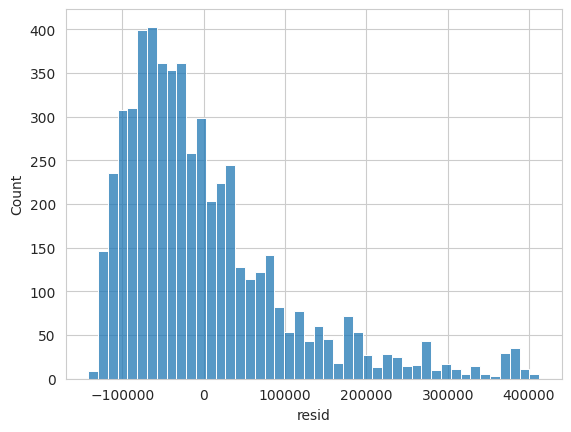

In [ ]:
# check residual normality
sns.histplot(data=filtered_df, x='resid')

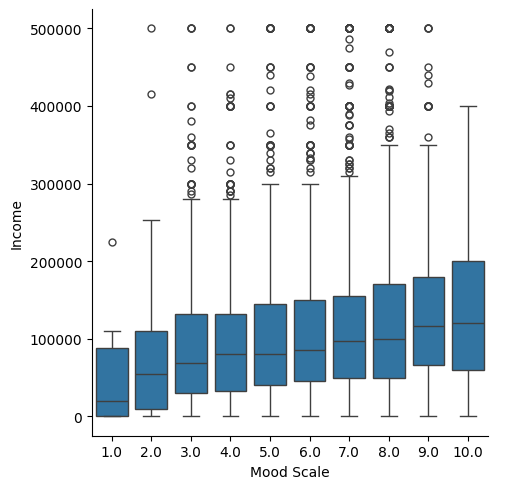

In [ ]:
# boxplot for qualitative ordinal variable
sns.catplot(x=mood, y=income, data=filtered_df, kind="box")